# HarvestStat Data Profiling - Mauritania

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Mauritania'
country_iso2 = 'MR'
use_api_data = False
requires_authentication = False
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'epsg:3243' # Mauritania
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_MR.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# 1. Default setting
# a) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'

# 2. Manual setting
# a) Add admin names to reporting units
admin_level = 'admin_1'
reporting_unit = df.loc[df['fnid'].map(lambda x: x[6] != 'A'), 'fnid'].unique()
df.loc[df.fnid.isin(reporting_unit),admin_level] = df.loc[df.fnid.isin(reporting_unit), 'locality_name'].map(lambda x: x.split(',')[0])

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df)
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([MR_Admin1_1990, MR_Admin2_1990], axis=0)
PlotAdminShapes(shape_used, label=True)
# ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 3,988
Removed 1,107 "Missing Value" points
0/997 "Area Harvested" points are retained.
985/997 "Area Planted" points are retained.
953/997 "Quantity Produced" points are retained.
943/997 "Yield" points are retained.
Current data points: 2,881

- Minor changes are applied ------------------- #

- Basic information --------------------------- #


Data period: 1989 - 2019
7 grain types are found: Cowpea (unspecified), Groundnuts (In Shell), Maize (Corn), Millet, Rice (Paddy), Sorghum, Wheat Grain
8 seasons are found: Annual (06-01), Main (09-01), Dam retention (02-01), Bas-fond (02-01), Hot off-season (06-01), Decrue controlee (04-01), Walo (04-01), Cold off-season (03-01)
6 crop production system are found: All (PS), dieri, dam irrigation, surface water, irrigated, parastatal recessional
Data sources include:
[1] Ministry of Rural Development, Mauritania --- FEWS NET Agro Maps, Mauritania
[2] Ministry of Rural Development, Mauritania --- Official Agricultural Statistics, Mauritania
Administrative-1 fnids: 10
Administrative-2 fnids: 0
0 reporting units are found: 

- Total production over time ------------------ #
season_name           Annual Bas-fond Cold off-season Dam retention  \
                                                                      
Cowpea (unspecified)    0.7%     0.1%            0.0%          0.0%   
Groun

- Recorded years per season ------------------- #
Annual: 31 years (1989-2019) (missing: 4 years)
Main: 18 years (1999-2016) (missing: 0 years)
Dam retention: 18 years (1999-2016) (missing: 6 years)
Bas-fond: 18 years (1999-2016) (missing: 0 years)
Hot off-season: 12 years (2005-2016) (missing: 0 years)
Decrue controlee: 17 years (2000-2016) (missing: 1 years)
Walo: 18 years (1999-2016) (missing: 0 years)
Cold off-season: 7 years (2010-2016) (missing: 2 years)

- Number of "Quantity Produced" data points --- #
MR1990A1: 953 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: Cowpea (unspecified)
----------------------------------------------- #
season_name              Annual      Bas-fond  Dam retention   Main                   Walo
crop_production_system All (PS) surface water dam irrigation  dieri parastatal recessional
fnid_short               1990A1        1990A1         1990A1 1990A1                 1990A1
year                                                                                      
1989                       6/13           NaN            NaN    NaN                    NaN
1990                       6/13           NaN            NaN    NaN                    NaN
1991                       5/13           NaN            NaN    NaN                    NaN
1992                       6/13           NaN            NaN    NaN                    NaN
1993                       5/13           NaN            NaN    NaN                    NaN
1994                        NaN           NaN    

season_name              Annual   Main
crop_production_system All (PS)  dieri
fnid_short               1990A1 1990A1
year                                  
1989                       7/13    NaN
1990                       6/13    NaN
1991                       6/13    NaN
1992                       6/13    NaN
1993                       5/13    NaN
1994                        NaN    NaN
1995                        NaN    NaN
1996                        NaN    NaN
1997                        NaN    NaN
1998                       2/13    NaN
1999                        NaN   5/13
2000                        NaN   6/13
2001                        NaN   5/13
2002                        NaN   2/13
2003                        NaN   5/13
2004                        NaN   5/13
2005                        NaN   4/13
2006                        NaN   4/13
2007                        NaN   5/13
2008                        NaN   3/13
2009                        NaN   5/13
2010                     

../figures/MR_admin_shapes.png is saved.


- Mauritania crop seasonal calendar

<img src="https://fews.net/sites/default/files/styles/large_width_880/public/2023-03/seasonal-calendar-mauritania.png?itok=fcsQC56T" width=900><br>

<img src="https://ipad.fas.usda.gov/rssiws/al/crop_calendar/images/wafrica_mr_calendar.png" width=900>

- comparison of boundaries

<img src="../figures/MR_admin_shapes.png" width=900>

- FDW data consists of `MR1990A1`.

- FEWS NET admin shapefiles ------------------- #

| year	 | Admin1   | # units   | Admin2   | # units   | Admin3   | # units   |
| :---: | :----:  | :----:   | :----:   | :---:  | :---:  | :---:  |
| 1990	 | MR1990A1 | 13	| MR1990A2	| 45	| nan	| 0	|

- **`MR1990A1`** is used to represent the current admin-level 1 crop data.
- Mauritania has seven crop seasons: `Annual`, `Dam retention`, `Bas-fond`, `Main`, `Walo`, `Hot off-season`, `Cold off-season`.
- Mauritania has seven crop production systems: `none`, `dam irrigation`, `surface water`, `dieri`, `flood recessional` , `parastatal recessional` , `irrigated`.


In [4]:
# Define the latest shapefile ------------------- #
latest_level = 1
shape_latest = MR_Admin1_1990.copy().to_crs('epsg:4326')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
# ----------------------------------------------- #

# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
area_all, prod_all = area.copy(), prod.copy()
mdx_pss = area.columns.droplevel([0,1]).unique()
# ----------------------------------------------- #

In [5]:
# Link admin boundaries ------------------------- #
link, over = FDW_PD_CreateAdminLink(MR_Admin1_1990, MR_Admin1_1990, 'ADMIN1', 'ADMIN1', prod, epsg)
# Crop specific ratios
link_ratio = FDW_PD_RatioAdminLink(link, prod, over, mdx_pss)
# Add current unit to link_ratio
for fnid_new in link_ratio.keys():
    link_ratio[fnid_new][fnid_new] = 1.0
    link_ratio[fnid_new] = link_ratio[fnid_new].sort_index(axis=1, ascending=False)
# Connect data with AdminLink
area_new, prod_new = FDW_PD_ConnectAdminLink(link_ratio, area, prod, validation=True)
# ----------------------------------------------- #

CBR is considered for 'MR1990A108' as no record found in: ['MR1990A108']


CBR is considered for 'MR1990A113' as no record found in: ['MR1990A113']
CBR is considered for 'MR1990A111' as no record found in: ['MR1990A111']


In [6]:
# Manual correction ----------------------------- #
crop_new = prod_new/area_new
# ----------------------------------------------- #

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = (prod_new/area_new).T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #

All [country, season_name] are in the external season calendar.


In [7]:
# Based on a comparison with FAOSTAT ------------ #
sub = stack[
    (stack['season_name'] == 'Annual') &
    (stack['product'] == 'Millet')
]
sub

,fnid,country,country_code,admin_1,admin_2,name,product,season_name,planting_year,planting_month,harvest_year,harvest_month,crop_production_system,indicator,value
0,MR1990A101,Mauritania,MR,Hodh ech Chargui,none,Hodh ech Chargui,Millet,Annual,1989,6,1989,11,All (PS),area,7393.000000
1,MR1990A101,Mauritania,MR,Hodh ech Chargui,none,Hodh ech Chargui,Millet,Annual,1989,6,1989,11,All (PS),production,3696.000000
2,MR1990A101,Mauritania,MR,Hodh ech Chargui,none,Hodh ech Chargui,Millet,Annual,1989,6,1989,11,All (PS),yield,0.499932
3,MR1990A101,Mauritania,MR,Hodh ech Chargui,none,Hodh ech Chargui,Millet,Annual,1990,6,1990,11,All (PS),area,12322.000000
4,MR1990A101,Mauritania,MR,Hodh ech Chargui,none,Hodh ech Chargui,Millet,Annual,1990,6,1990,11,All (PS),production,6161.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,MR1990A110,Mauritania,MR,Guidimaka,none,Guidimaka,Millet,Annual,1992,6,1992,11,All (PS),production,829.000000
2242,MR1990A110,Mauritania,MR,Guidimaka,none,Guidimaka,Millet,Annual,1992,6,1992,11,All (PS),yield,0.500302
2243,MR1990A110,Mauritania,MR,Guidimaka,none,Guidimaka,Millet,Annual,1993,6,1993,11,All (PS),area,1283.000000
2244,MR1990A110,Mauritania,MR,Guidimaka,none,Guidimaka,Millet,Annual,1993,6,1993,11,All (PS),production,77.000000


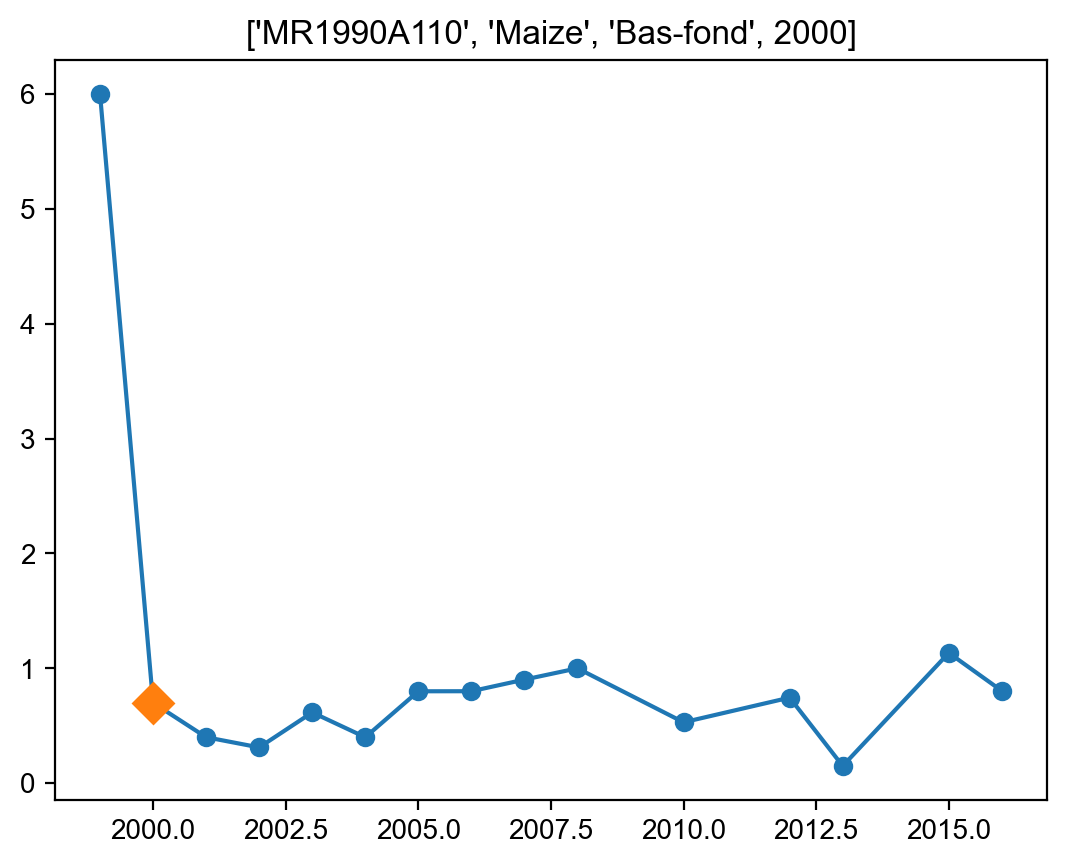

In [8]:
from matplotlib import pyplot as plt

#define a QC flag field
# 0 = no flag
# 1 = outlier
stack['QC_flag'] = 0

outliers = [['MR1990A110','Maize','Bas-fond',2000],
           ]
stack=stack.sort_values(by='harvest_year')

#first plot, then remove the values (yield, production and harvested area)
for iou in outliers:
    plt.figure()
    plt.plot(stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')].harvest_year.values,
            stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')].value.values,'-o')
    plt.plot(stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')&(stack.harvest_year==iou[3])].harvest_year.values,
            stack[(stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.indicator=='yield')&(stack.harvest_year==iou[3])].value.values,'D',markersize=10)
    plt.title(str(iou))
    stack.loc[((stack.fnid==iou[0])&(stack['product']==iou[1])&(stack.season_name==iou[2])&(stack.harvest_year==iou[3])),'QC_flag']=1   
    

In [9]:
# Save data
fn_out = '../data/crop/adm_crop_production_MR.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')
save_npz('../data/crop/adm_crop_production_MR_ratio.npz', link_ratio)

../data/crop/adm_crop_production_MR.csv is saved.
../data/crop/adm_crop_production_MR_ratio.npz is saved.


## Visualization of production data

/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


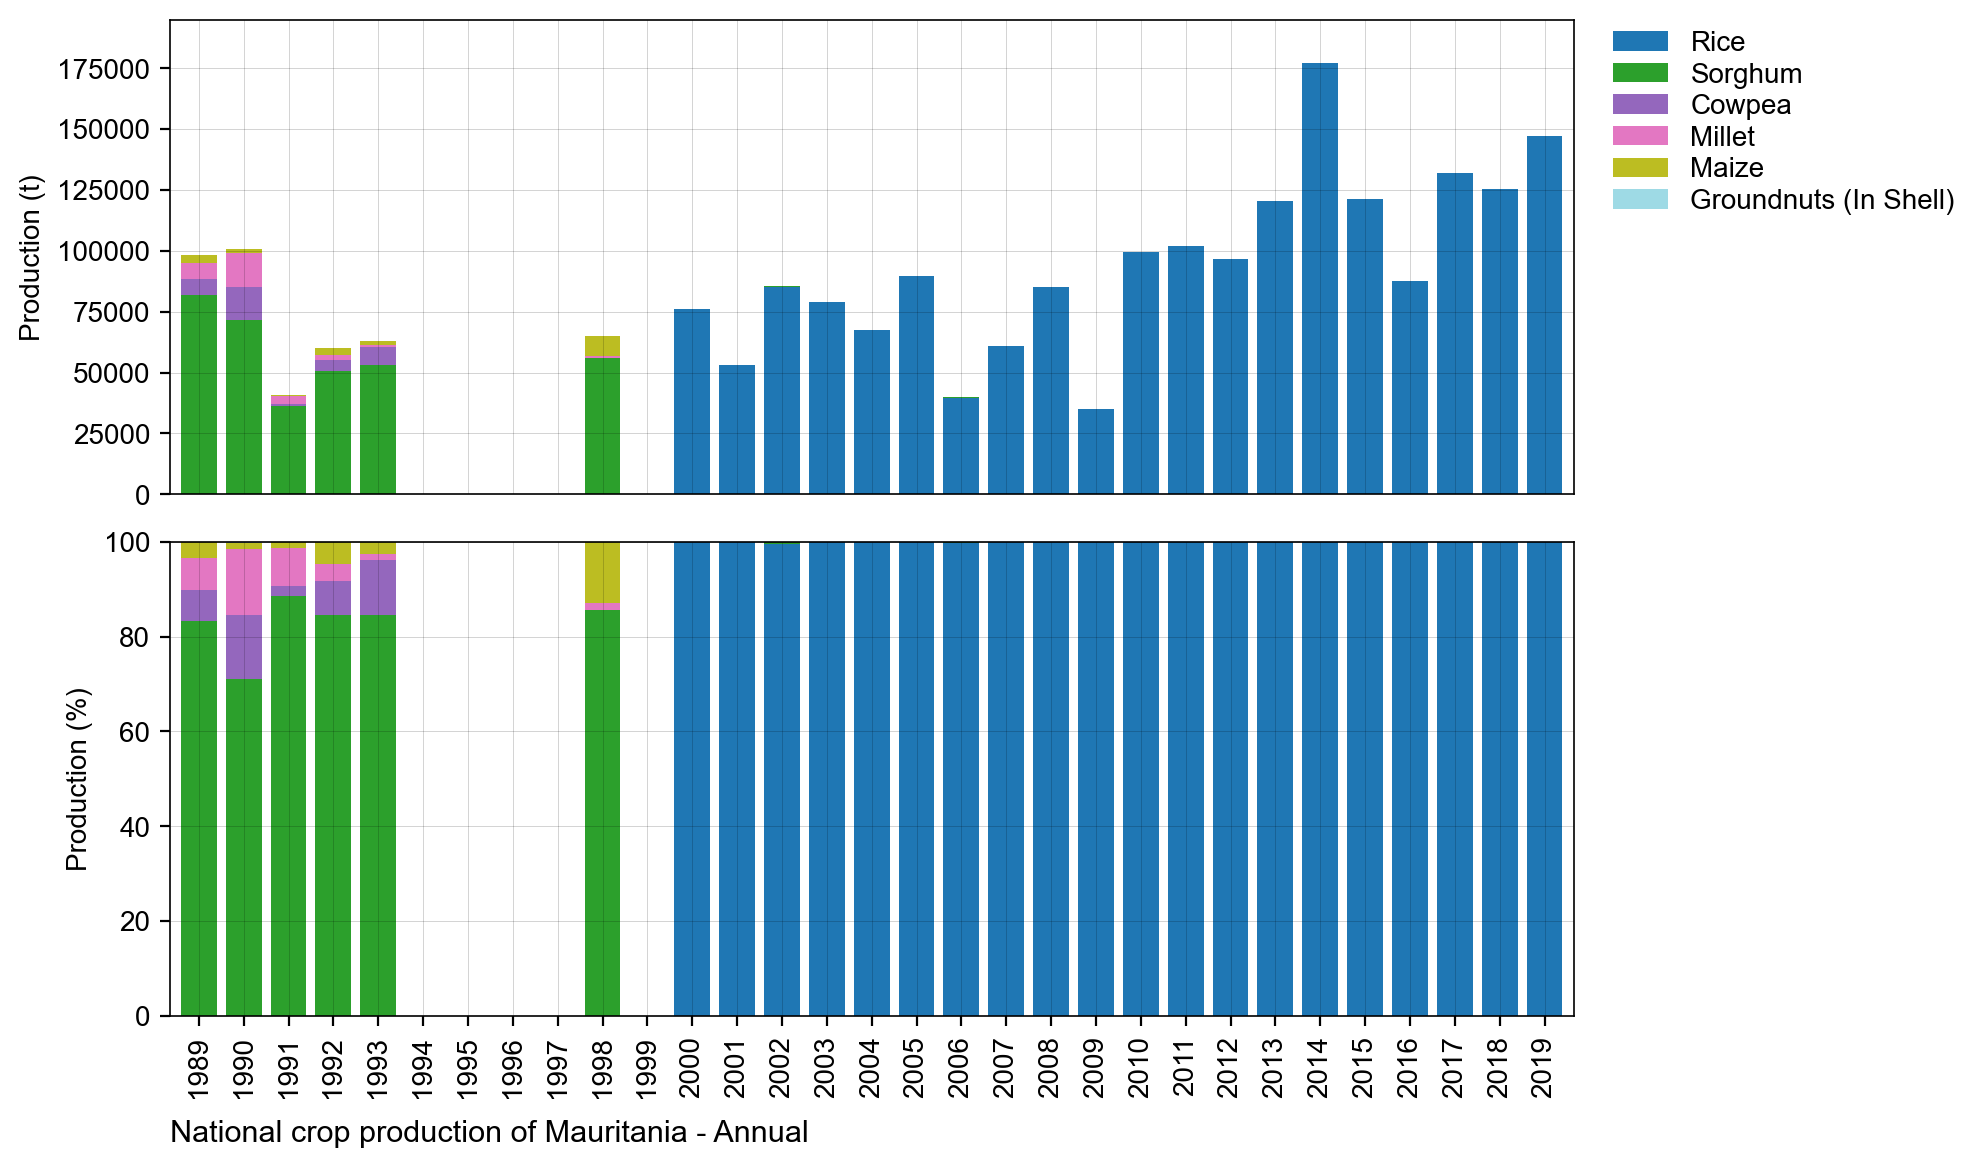

../figures/MR_bar_natgrainprod_Annual.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


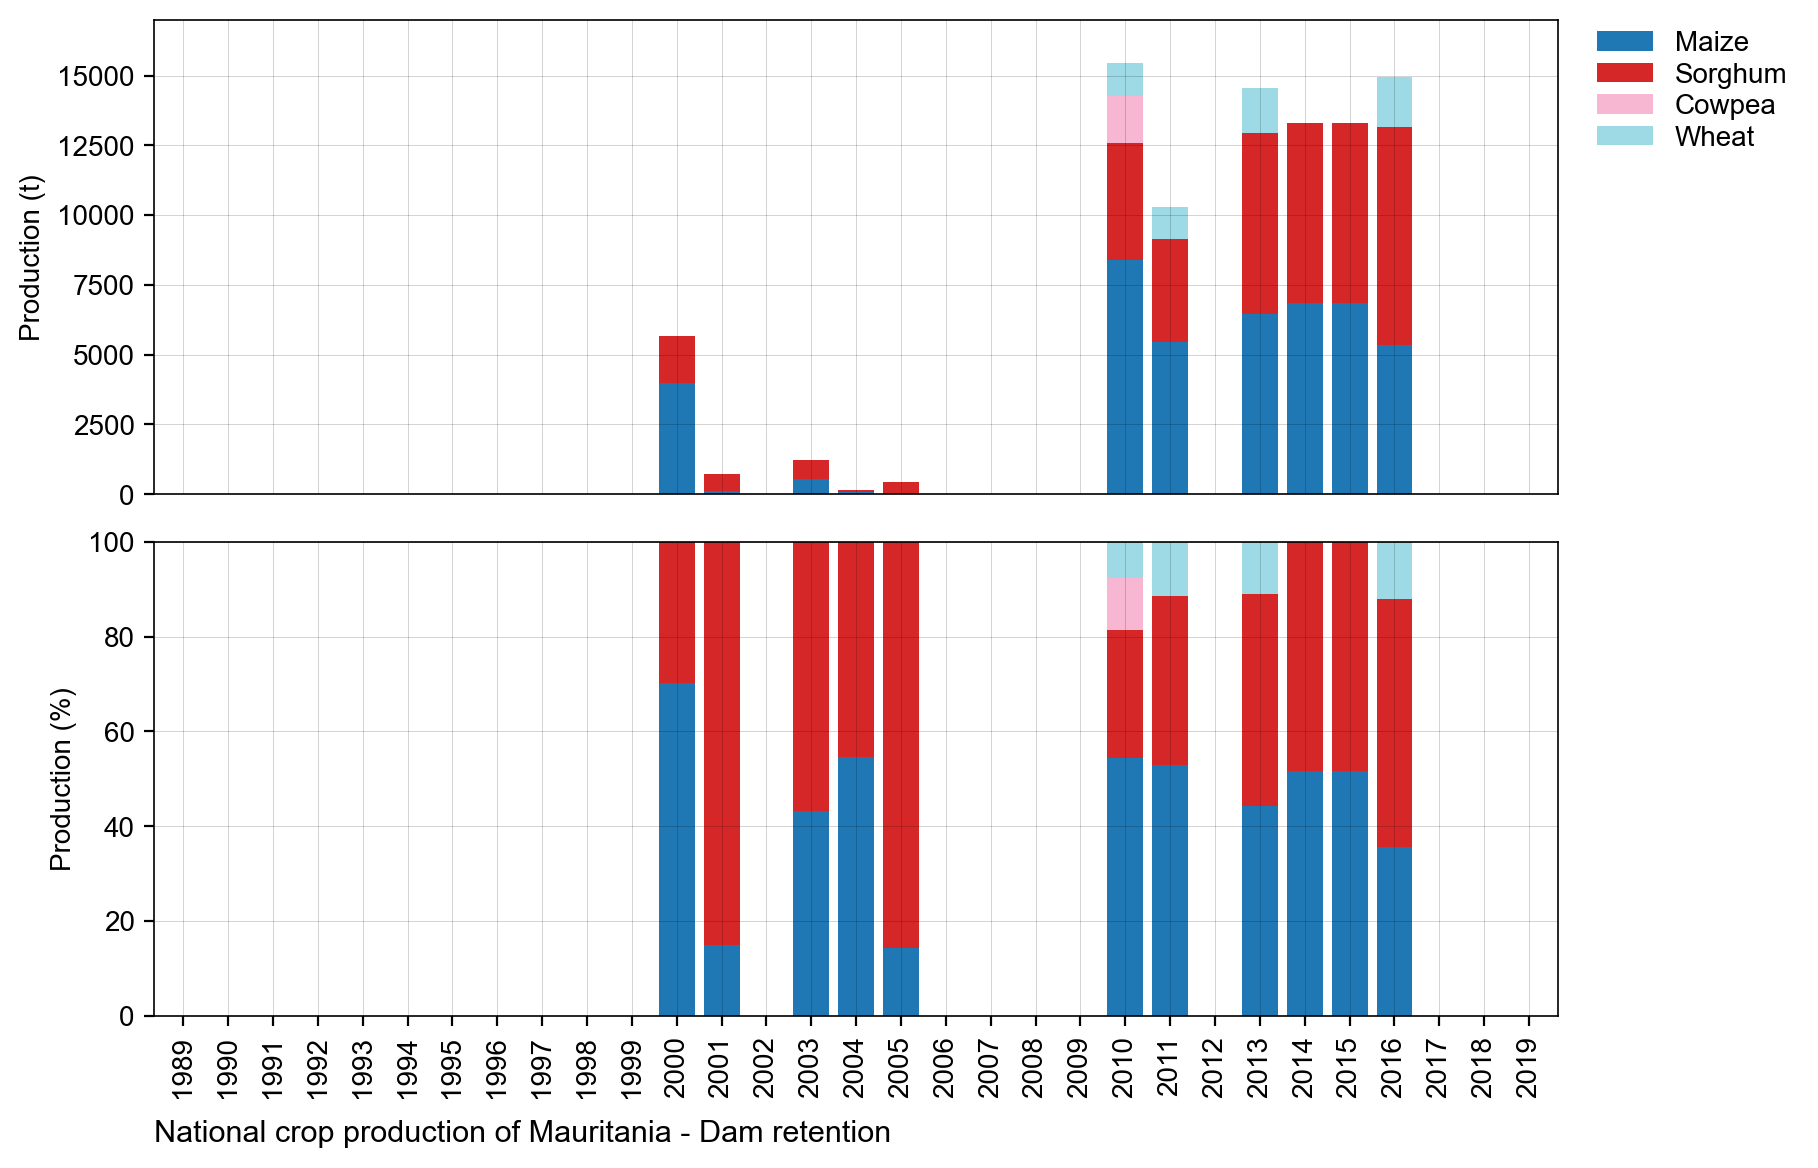

../figures/MR_bar_natgrainprod_Dam retention.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


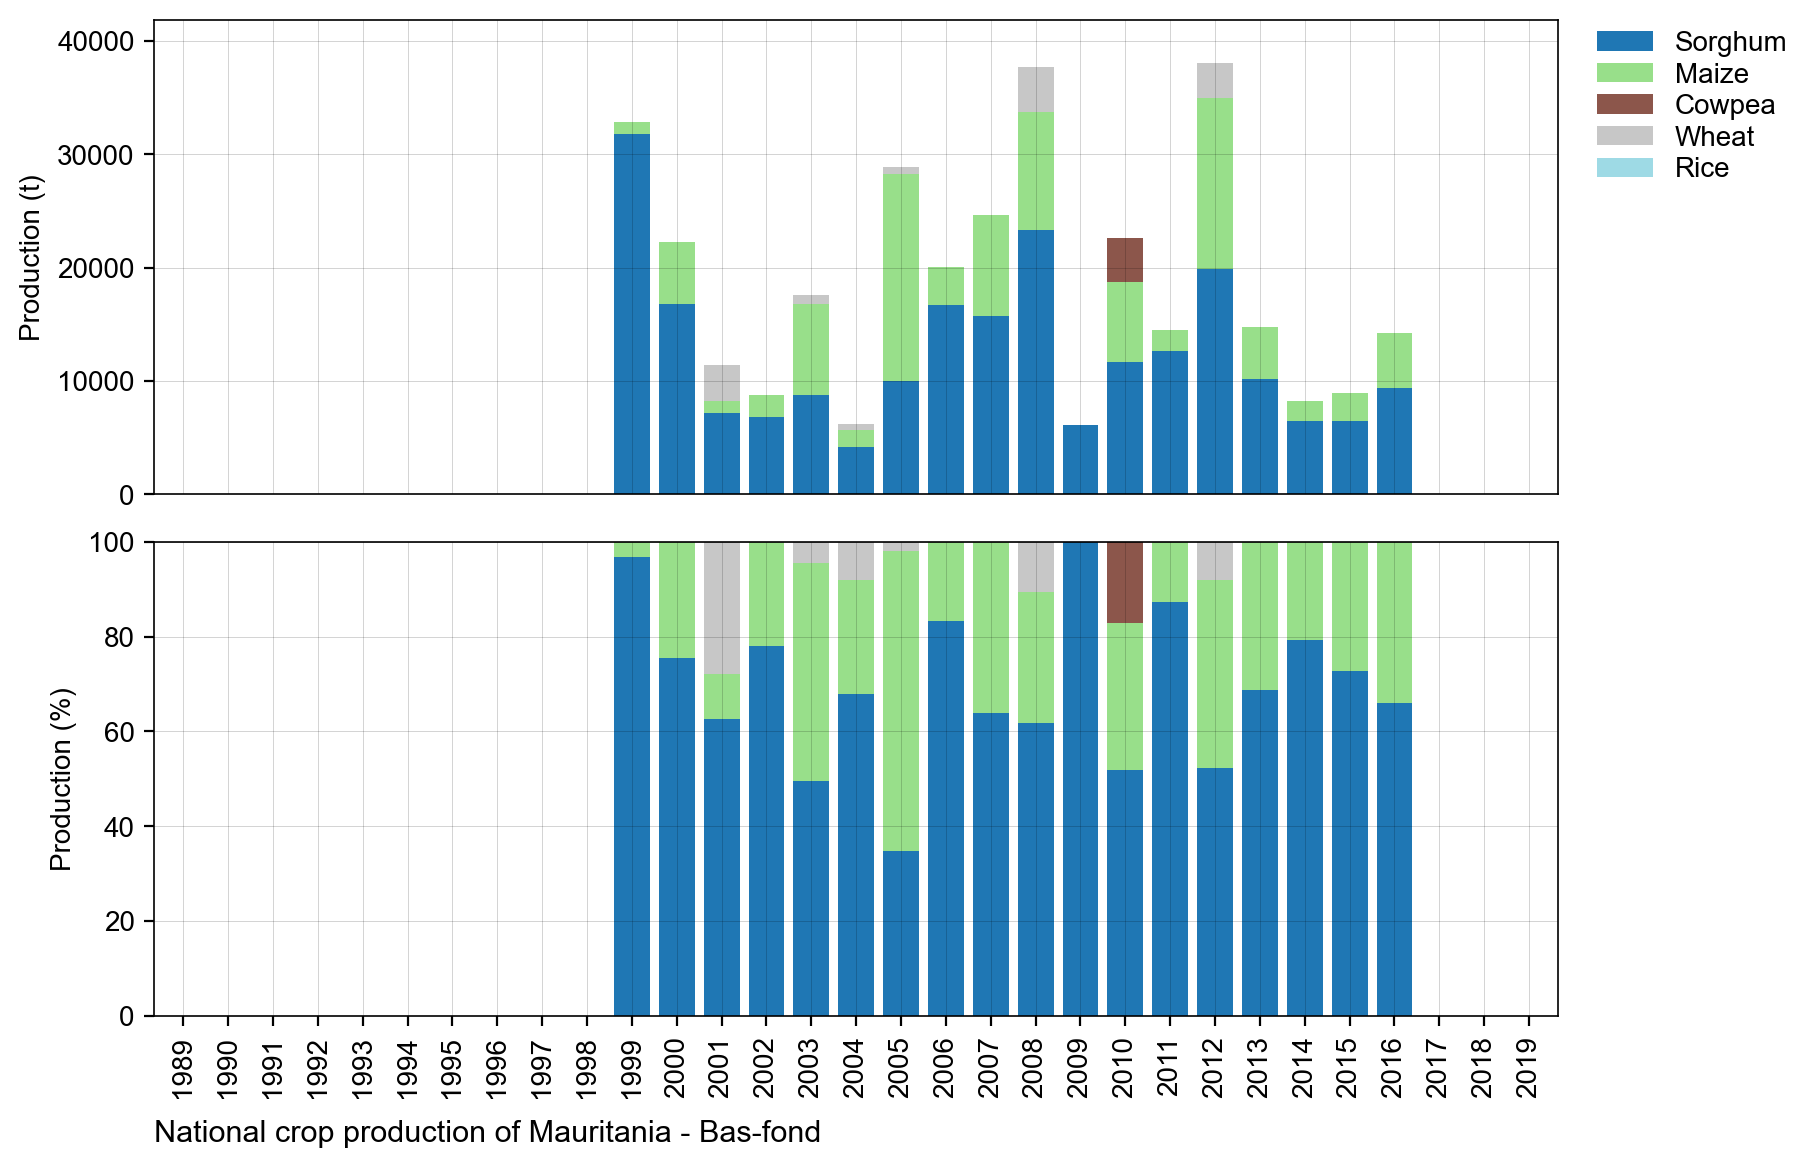

../figures/MR_bar_natgrainprod_Bas-fond.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


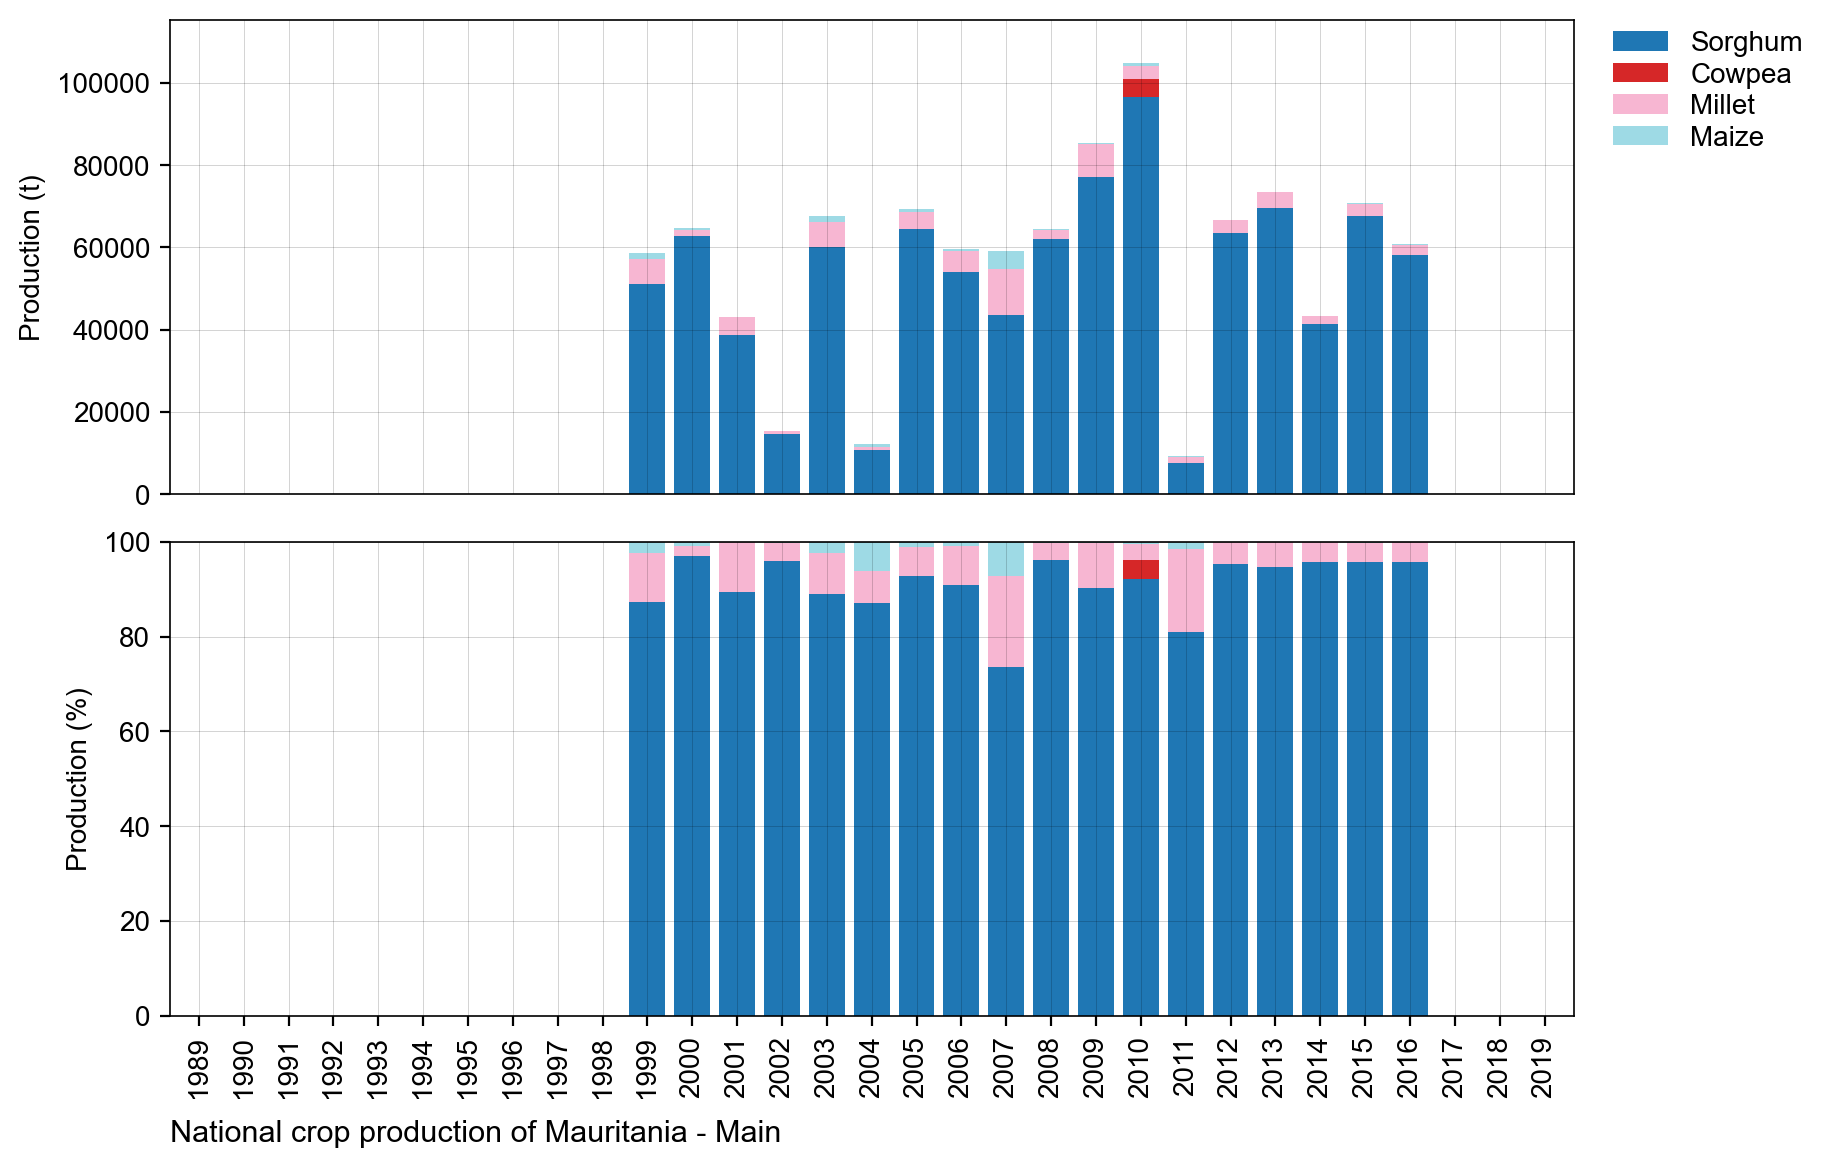

../figures/MR_bar_natgrainprod_Main.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


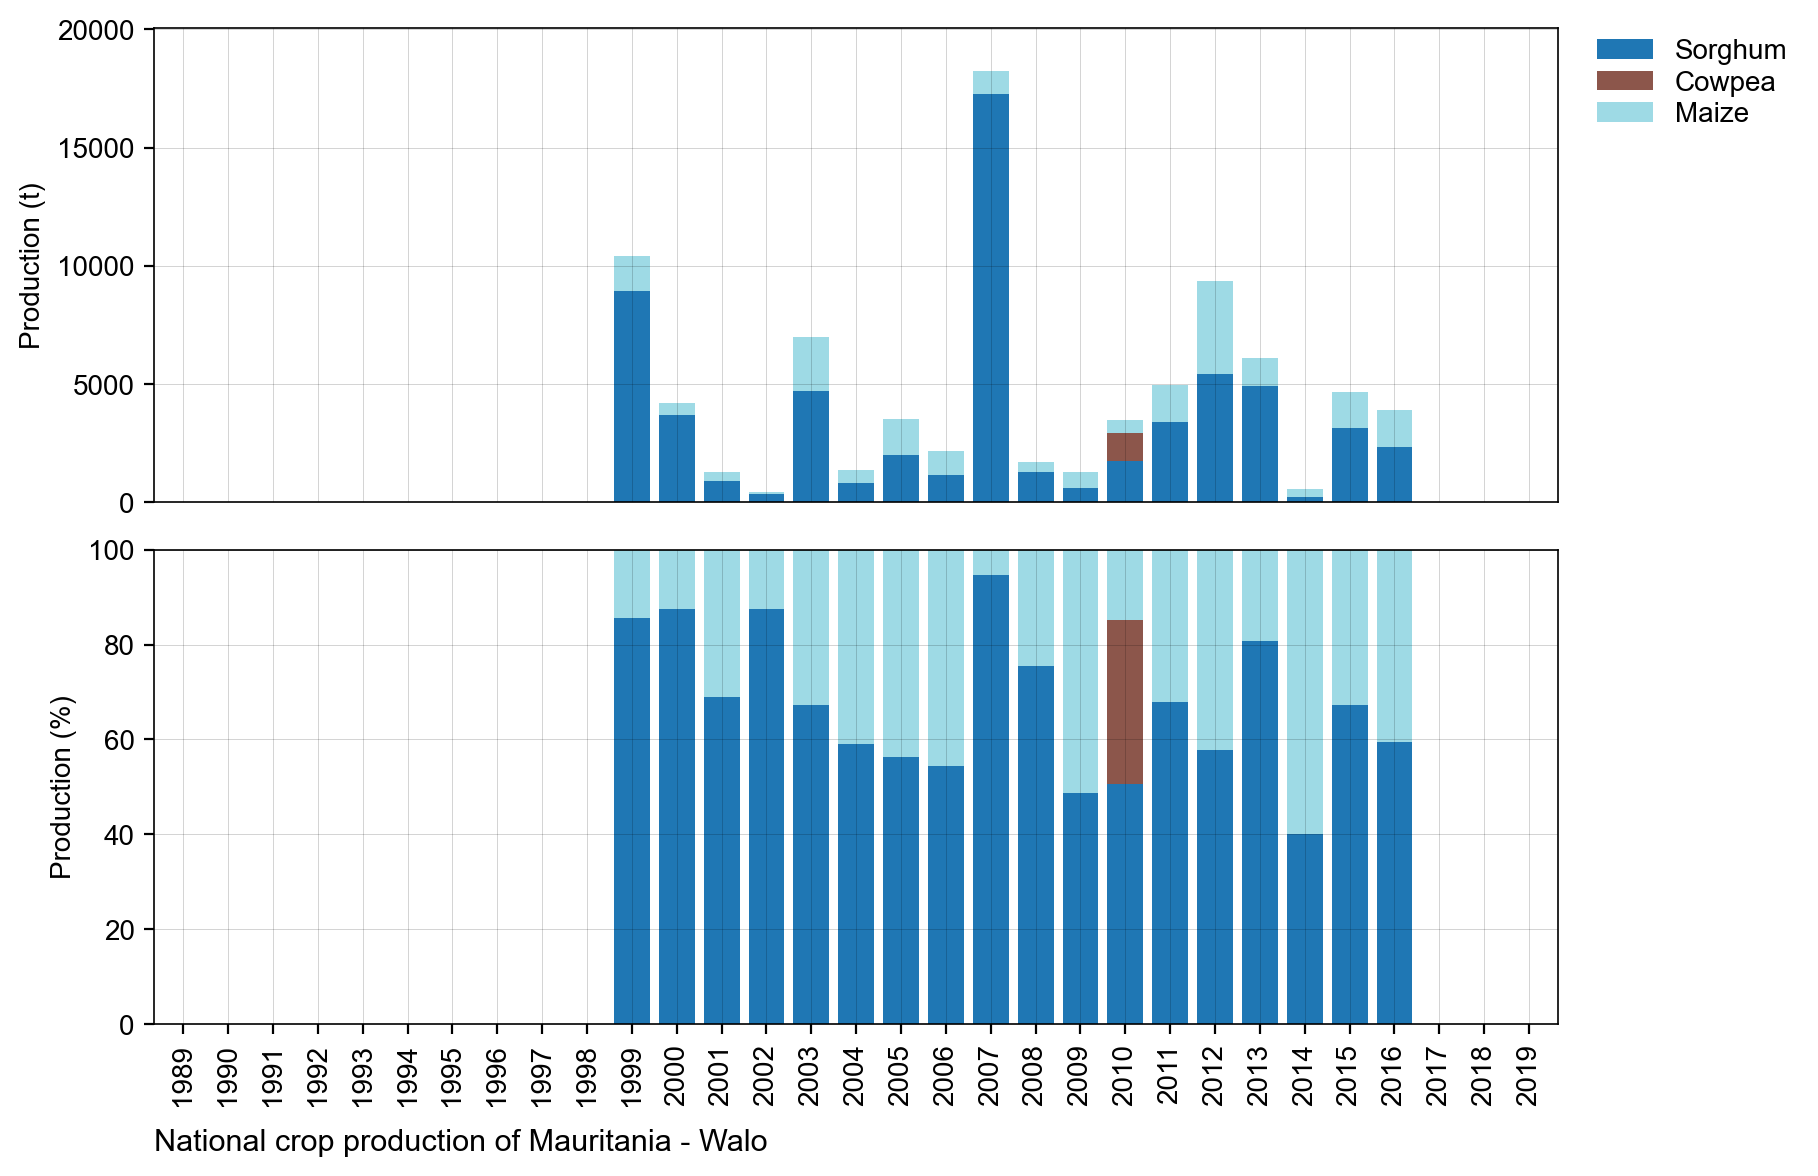

../figures/MR_bar_natgrainprod_Walo.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


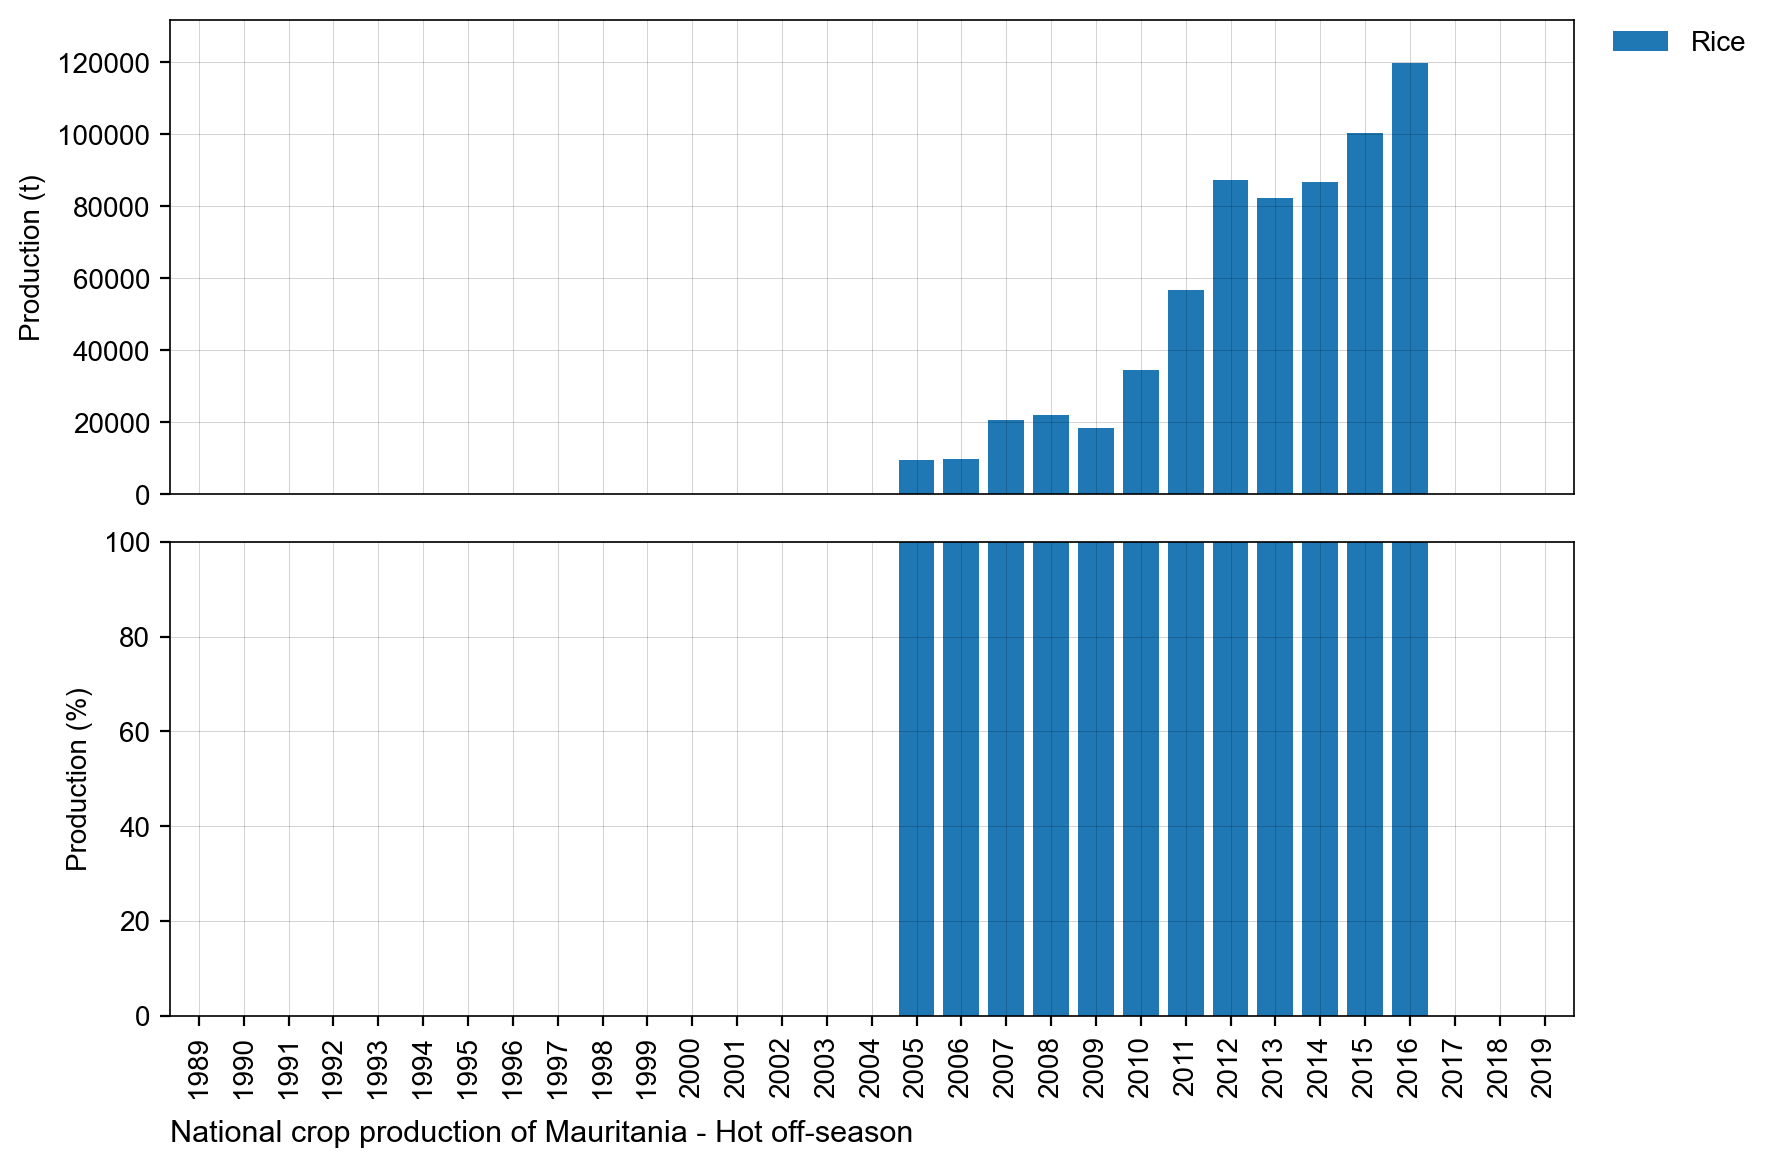

../figures/MR_bar_natgrainprod_Hot off-season.png is saved.


/Users/dlee/harveststat-africa/notebook/tools_graphic.py:135: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axes[1].grid(which='minor', axis='x', linestyle='-', color='black', visible=False)


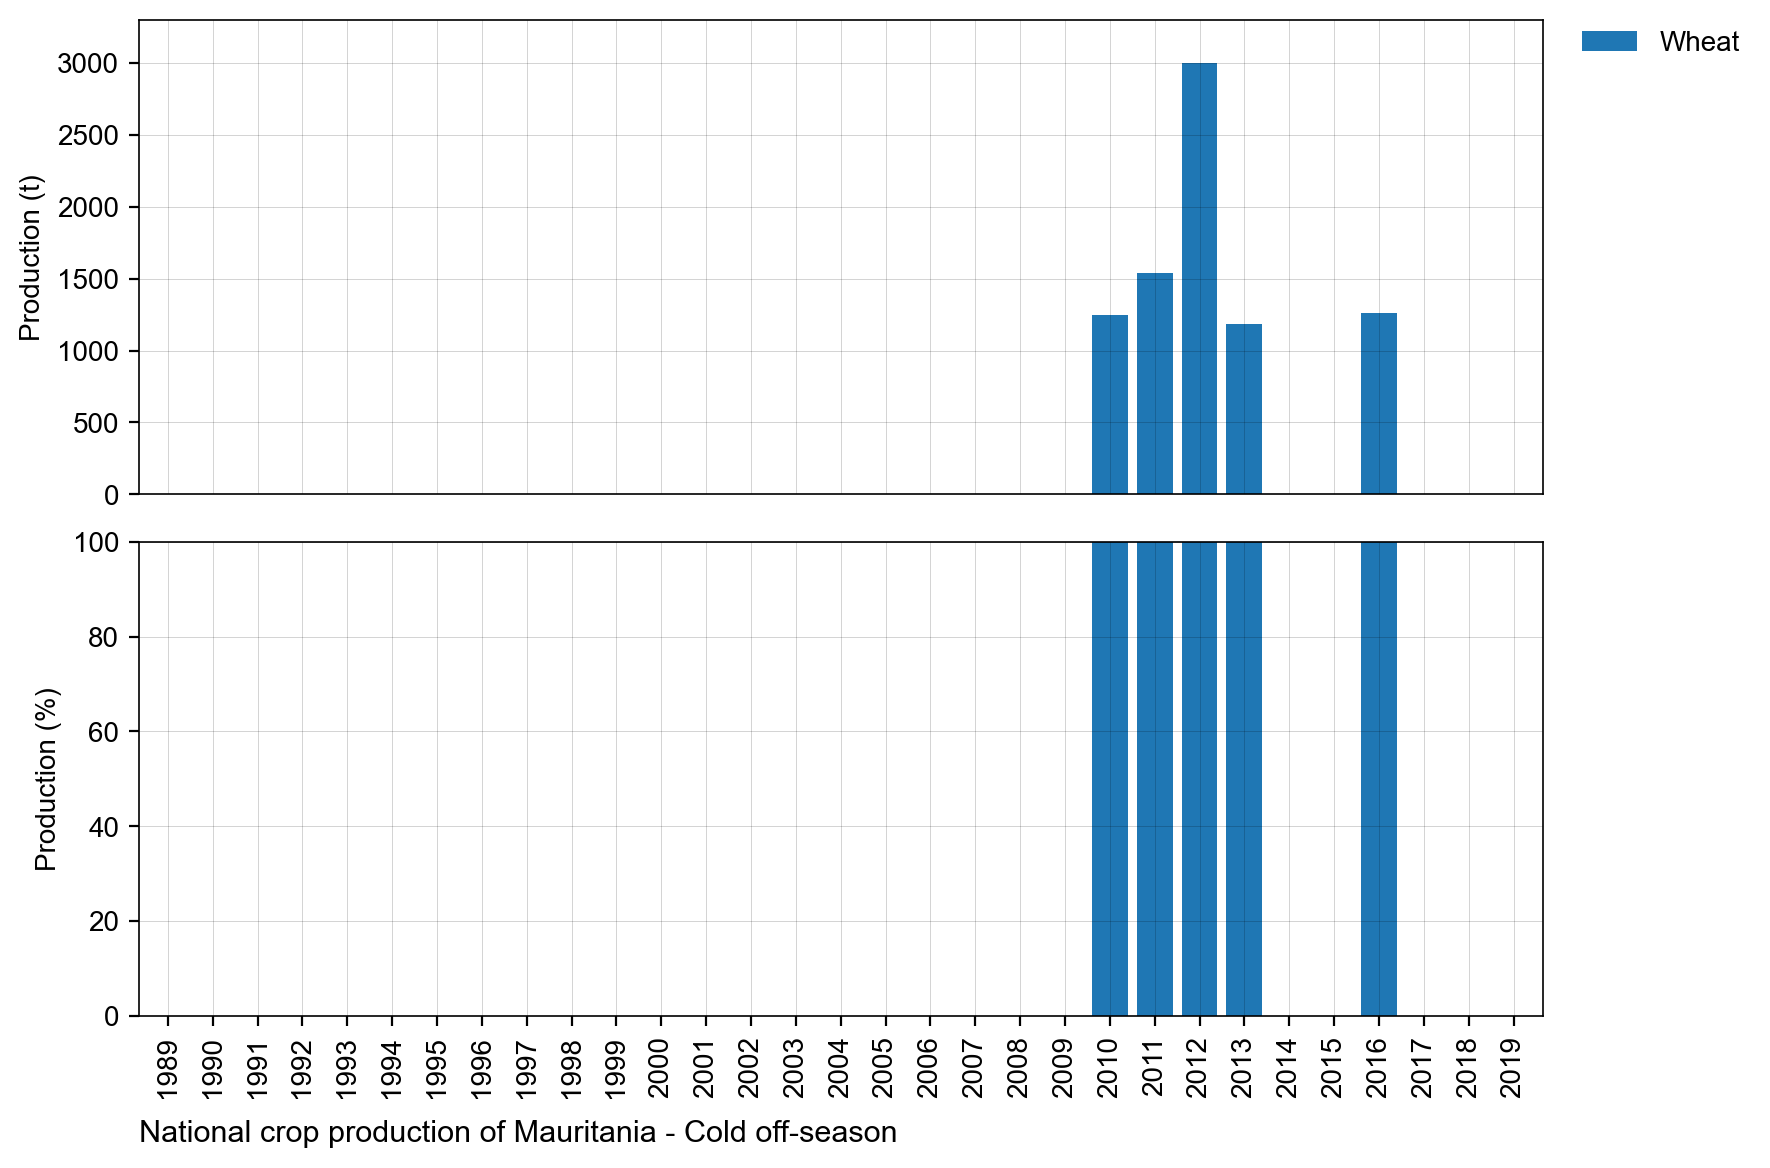

../figures/MR_bar_natgrainprod_Cold off-season.png is saved.


In [10]:
# Bar chart of national grain production
country_iso, country_name = 'MR', 'Mauritania'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df = df[df['QC_flag'] == 0] # remove outliers
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_order = ['Sorghum','Maize','Rice','Millet','Wheat']
for season_name in ['Annual', 'Dam retention', 'Bas-fond', 'Main', 'Walo', 'Hot off-season', 'Cold off-season']:
    footnote = 'National crop production of %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    PlotBarProduction(sub, year, footnote, fn_save)

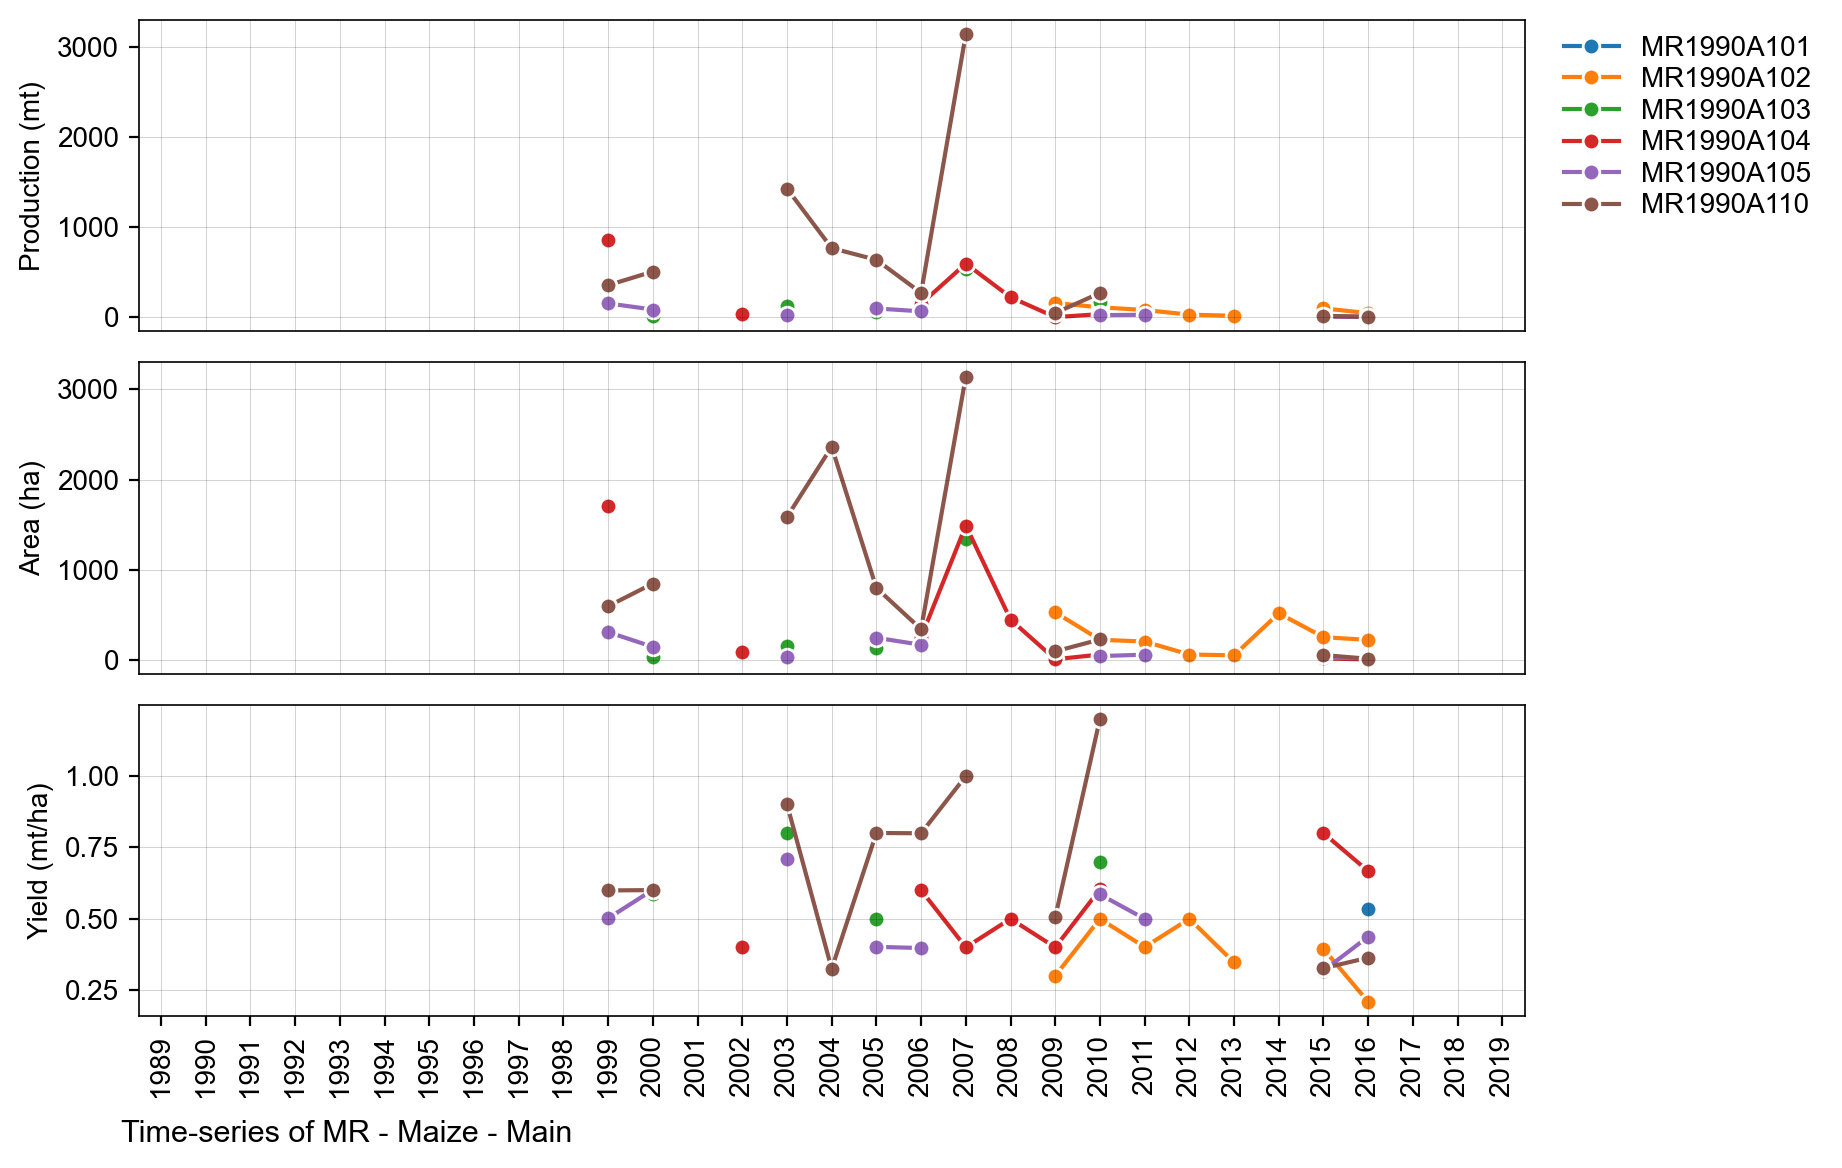

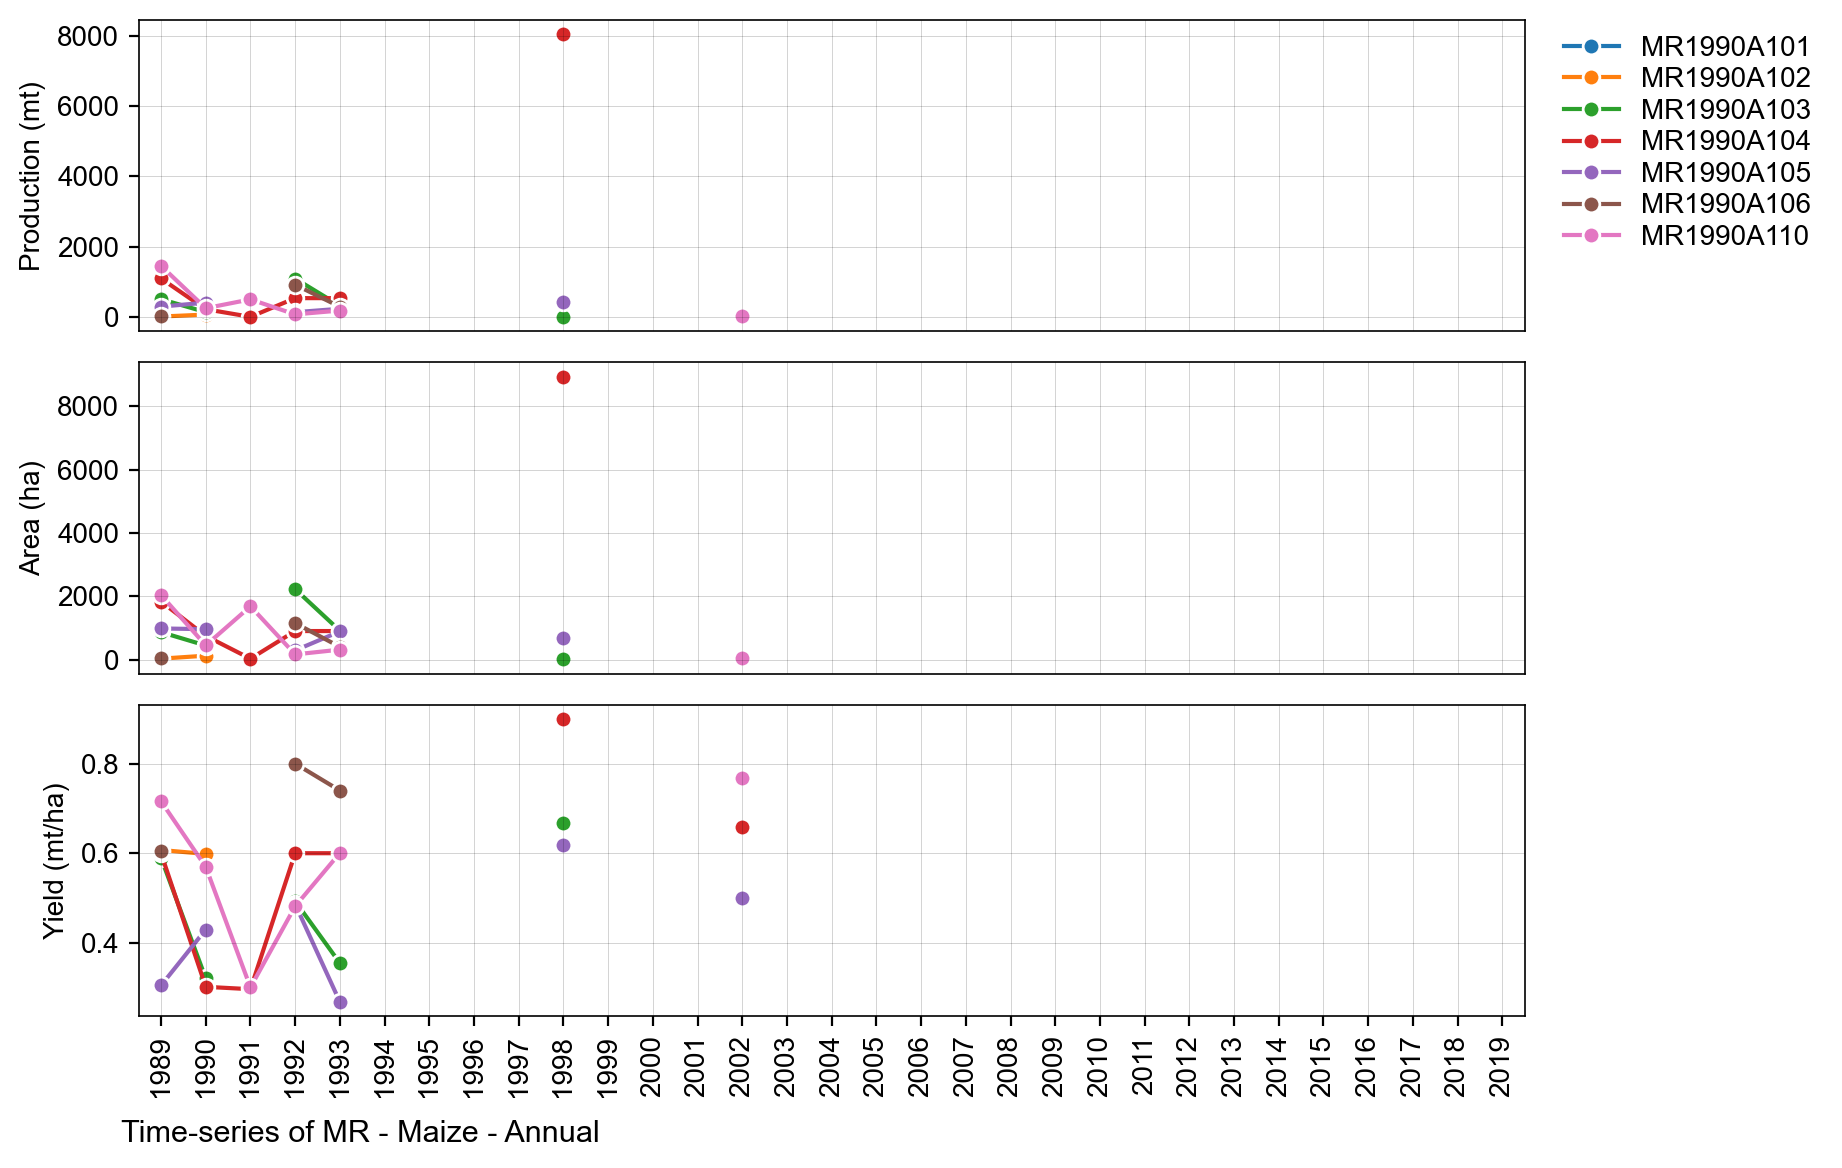

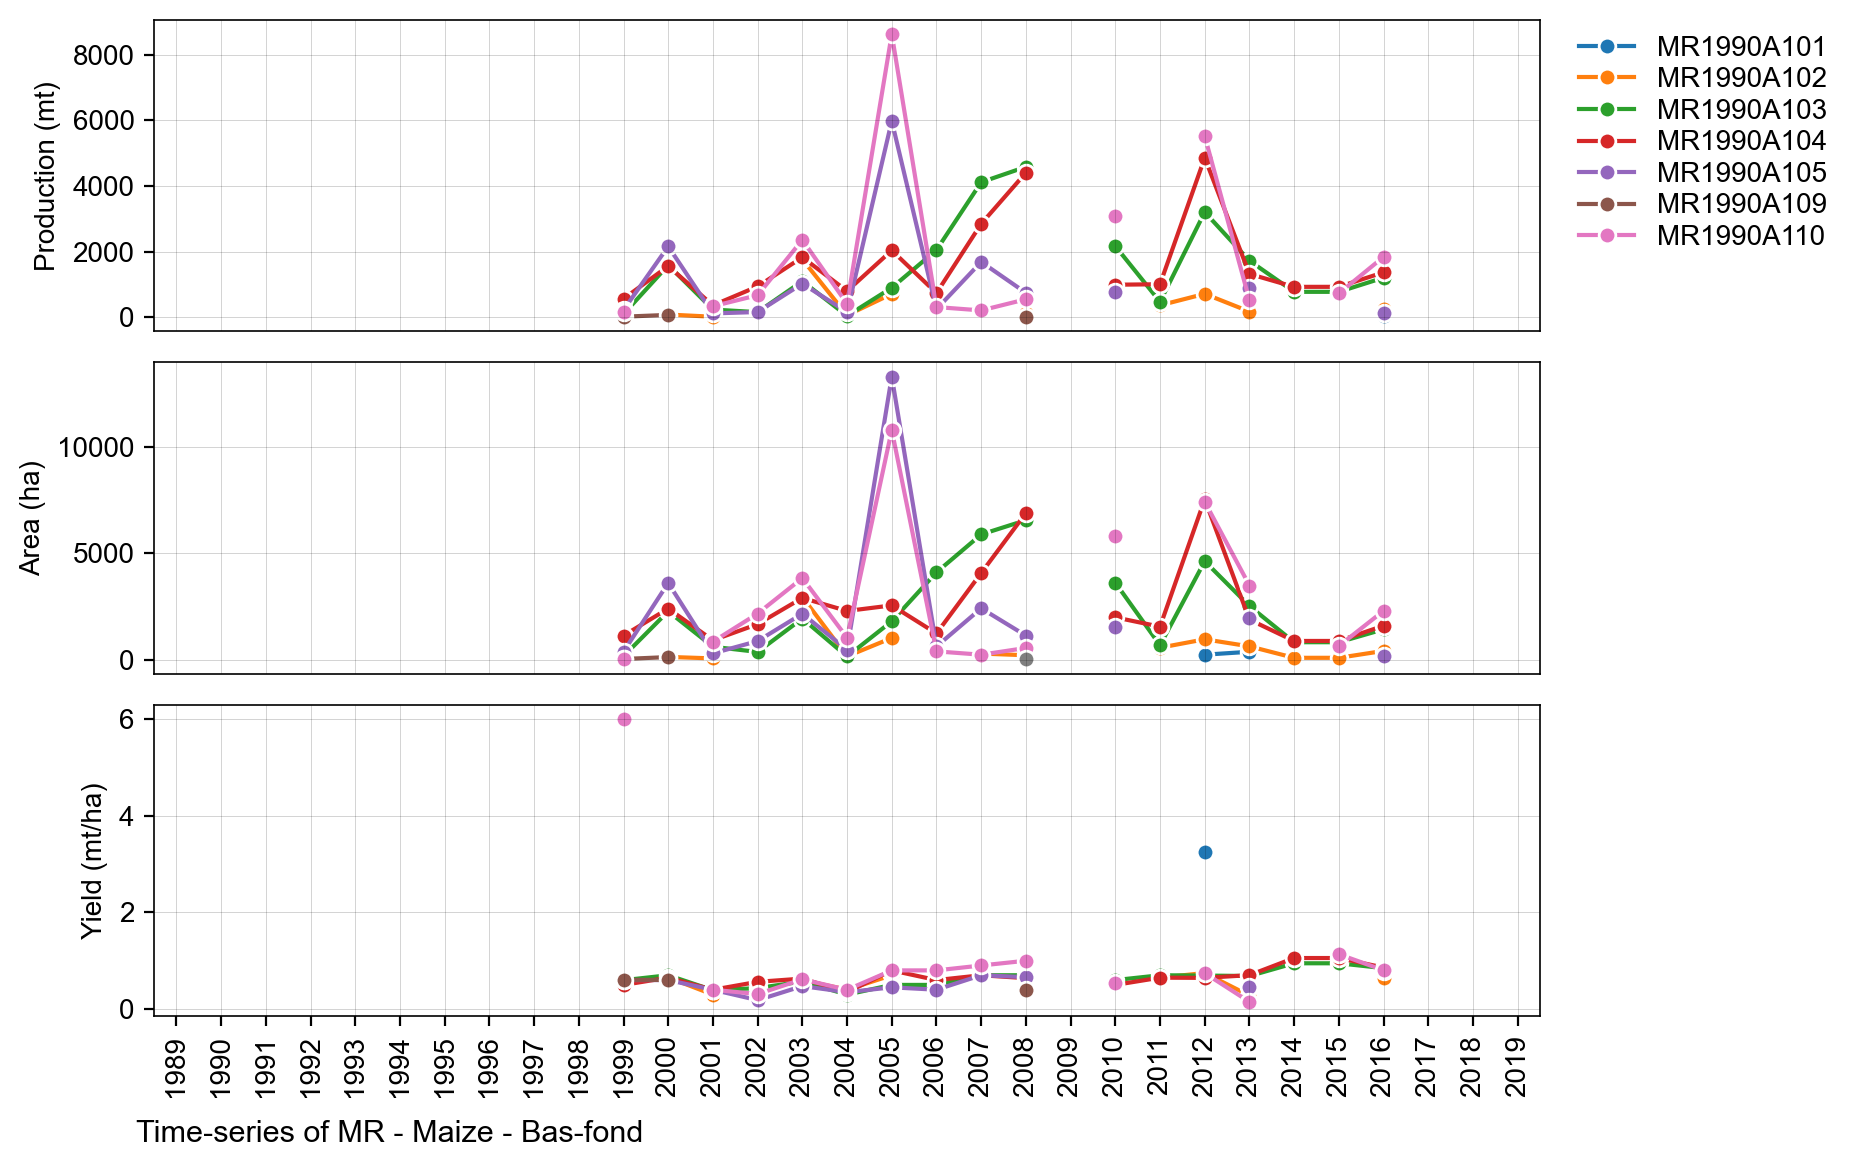

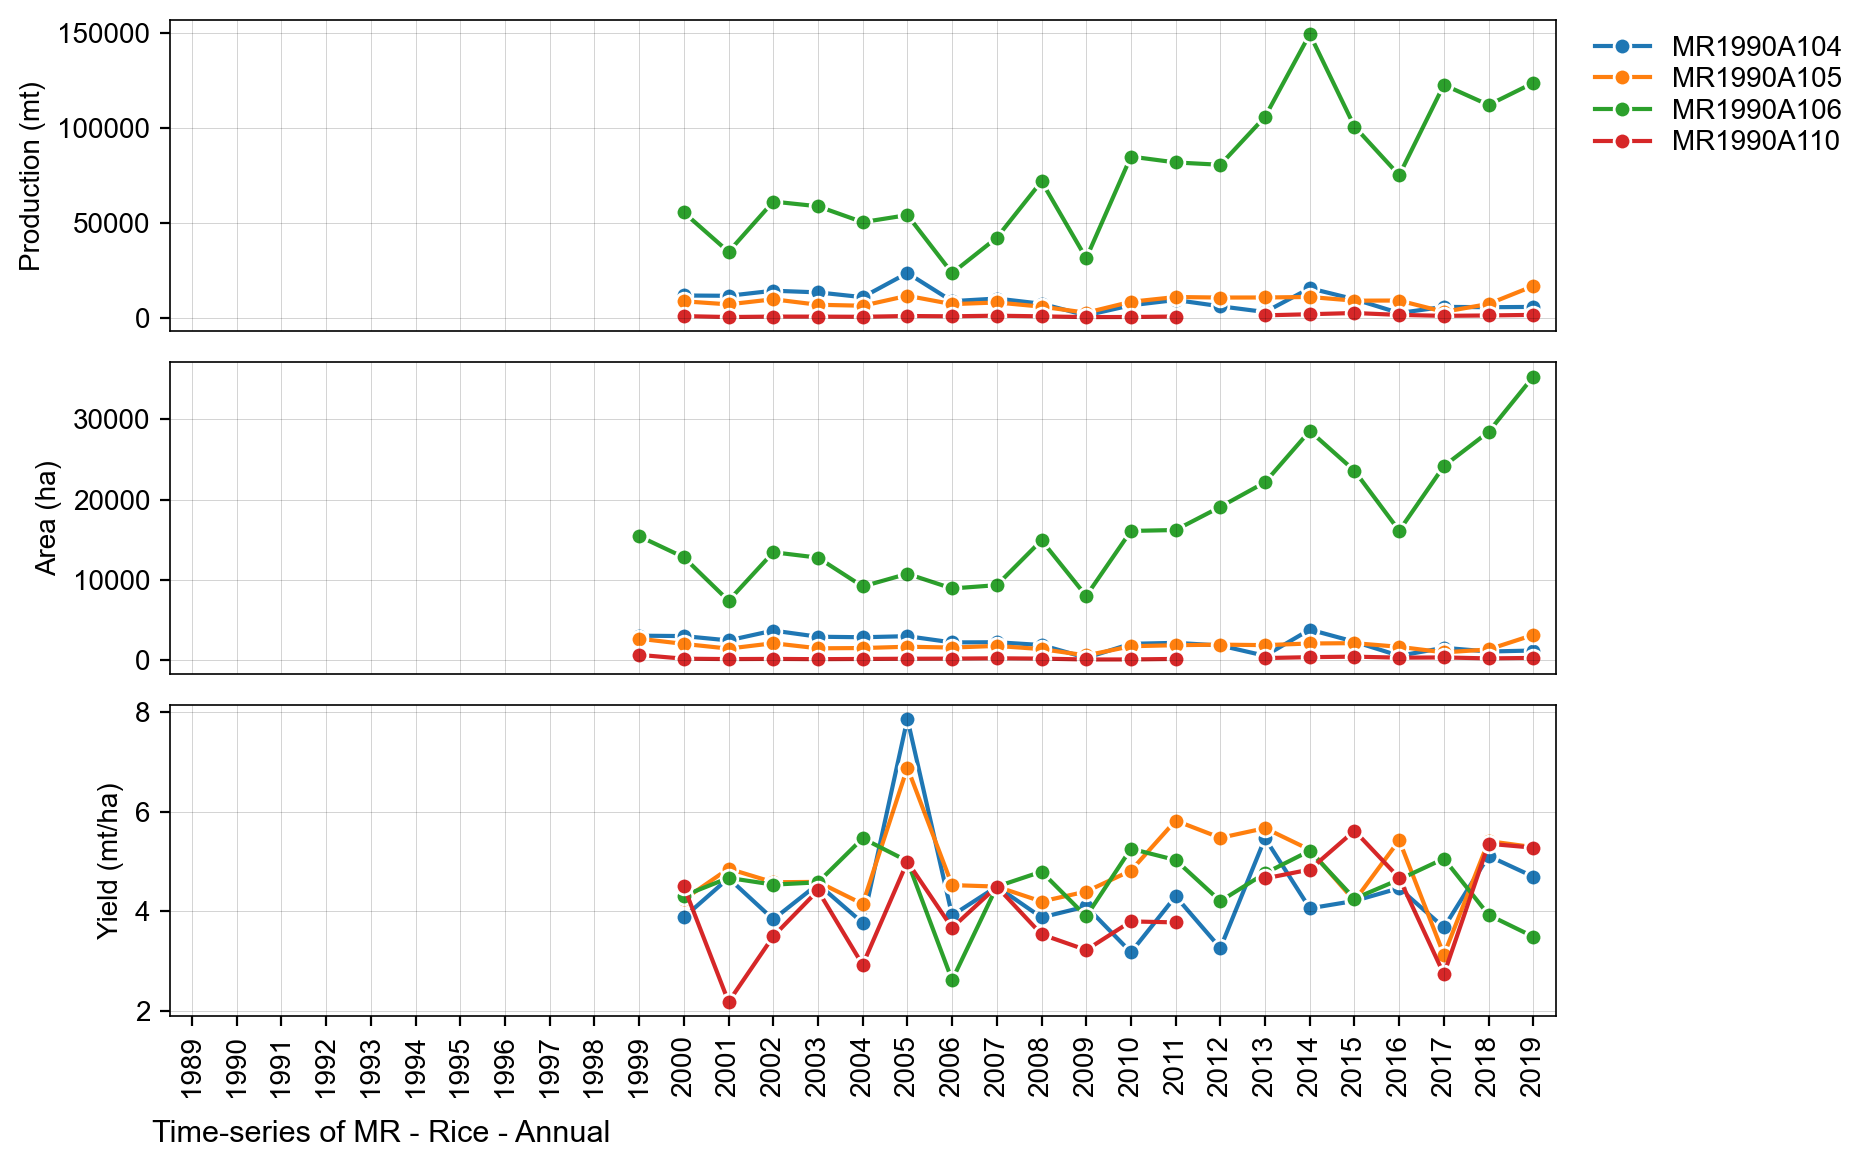

In [11]:
# Lineplot of Production-Area-Yield time-series
country_iso, country_name = 'MR', 'Mauritania'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df = df[df['QC_flag'] == 0] # remove outliers
df['year'] = df['harvest_year']
product_season = [
    ['Maize','Main'],
    ['Maize','Annual'],
    ['Maize','Bas-fond'],
    ['Rice','Annual'],
]
for product_name, season_name in product_season:
    footnote = 'Time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    PlotLinePAY(sub, year, footnote)